In [ ]:
!pip install gensim

In [ ]:
pip install pandas textblob

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from tqdm import tqdm
import numpy as np
import gensim
from textblob import TextBlob


In [ ]:
file = "DadosFinais2.xlsx"

In [ ]:
res = pd.read_excel(file, 'Reservas')
prop = pd.read_excel(file, 'Propriedades')
guests = pd.read_excel(file, 'Hóspedes')
data = pd.read_excel(file, 'Reviews - geral')
reviews2 = pd.read_excel(file, 'Reviews - detalhe')

In [ ]:
data

,ReservationId,RatingValue,Comments,Language,Translated,Polarity,NetPromoterScore,Aspects,Aspects_Polarity
0,1879140693,8,"Very nice place, it was spacious and good loca...",__label__en,nice place spacious welllocated communication ...,Positive,Good,place,positive
1,1879140693,8,"Very nice place, it was spacious and good loca...",__label__en,nice place spacious welllocated communication ...,Positive,Good,location,positive
2,1879140693,8,"Very nice place, it was spacious and good loca...",__label__en,nice place spacious welllocated communication ...,Positive,Good,communication,positive
3,1879140693,8,"Very nice place, it was spacious and good loca...",__label__en,nice place spacious welllocated communication ...,Positive,Good,home,positive
4,1879140693,8,"Very nice place, it was spacious and good loca...",__label__en,nice place spacious welllocated communication ...,Positive,Good,reply,positive
...,...,...,...,...,...,...,...,...,...
63742,1879180188,4,"pro: melhor localização no centro da cidade, o...",__label__pt,pro best location city center apartment clean ...,Positive,Good,company,negative
63743,1879180188,4,"pro: melhor localização no centro da cidade, o...",__label__pt,pro best location city center apartment clean ...,Positive,Good,checkin,negative
63744,1879180188,4,"pro: melhor localização no centro da cidade, o...",__label__pt,pro best location city center apartment clean ...,Positive,Good,checkout,negative
63745,1879180188,4,"pro: melhor localização no centro da cidade, o...",__label__pt,pro best location city center apartment clean ...,Positive,Good,luggage,negative


In [ ]:
ra = data[['Translated','Aspects']]

In [ ]:
ra

,Translated,Aspects
0,nice place spacious welllocated communication ...,place
1,nice place spacious welllocated communication ...,location
2,nice place spacious welllocated communication ...,communication
3,nice place spacious welllocated communication ...,home
4,nice place spacious welllocated communication ...,reply
...,...,...
63742,pro best location city center apartment clean ...,company
63743,pro best location city center apartment clean ...,checkin
63744,pro best location city center apartment clean ...,checkout
63745,pro best location city center apartment clean ...,luggage


In [ ]:
ra = ra.groupby('Translated')['Aspects'].apply(list).reset_index()

In [ ]:
ra['Number'] = ra['Aspects'].apply(len)

In [ ]:
ra['review_length'] = ra['Translated'].apply(len)

In [ ]:
ra

,Translated,Aspects,Number,review_length
0,absolute recommendation would book star,"[recommendation, star]",2,39
1,absolute top location easily explore lisbon fo...,"[location, public transportation, apartment, a...",11,396
2,absolutely amazing great host super location c...,"[host, location]",2,60
3,absolutely amazing home home brand new literal...,"[home, location, hospitality]",3,153
4,absolutely amazing location clean place host a...,"[location, place, host]",3,104
...,...,...,...,...
10255,would useful know apartment accessible car lea...,"[apartment, car, luggage, loading unloading]",4,98
10256,wow apartment think rooftop lisbon beat one bn...,"[apartment, rooftop, checkin, interpersonal as...",5,182
10257,wow friend love place apartment amazing wonder...,"[place, apartment, view, area, Lisbon]",5,124
10258,wow star expected lady welcomed u super friend...,"[lady, apartment, location, response]",4,234


In [ ]:
ra['Number'].value_counts()

Number
3       1646
2       1487
4       1419
5       1100
6        946
7        619
8        597
9        484
10       356
11       314
12       256
13       214
1        176
14       149
15       121
16        90
17        58
18        48
19        47
21        28
20        24
22        20
23        11
27         7
25         7
24         6
32         5
26         4
28         4
30         2
37         2
34         2
31         2
40         2
38         1
29         1
36         1
61         1
1142       1
43         1
52         1
Name: count, dtype: int64

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
ra = ra.drop(ra[ra['Number'] == 1142].index)

In [ ]:
ra[ra['Number'] == 61]

,Translated,Aspects,Number,review_length
9701,translation positive amazing view large deck master bedroom one upper twin room amazing location wellequipped kitchen washerdryer empty water dryer regularly upper left corner dryer shared bathroom heated floor heated towel rack two car parking big plus margarita cleaning lady brought u care package wine fresh fruit arrival delightful gave u new dish rag negative checkin guy feel like home rude power upon arrival feel like home investigation told u owner paid power bill therefore power shut body hair drawer upper bedroom street side human nail clipping found side table living room one large towel hole mattress upper twin room extremely hard bruised hip guest move couch night mattress topper provided soften support inês managing company “ feel like home ” resolve issue unless owner resolve issue people group bring foamies put top pubic hair upstairs bathtub checkin floor underneath toilet bowl shared bathroom full dried urine dust kitchen rag sponge extremely stinky new one provided new guest hygienic reason mold issue master bedroom shower checkin guy rude beware wind shot patio door closed outside handle unit extremely well located street noise seagull noise night bring earplug two sink upstairs draining properly phone call managing company told porto issue finally someone came afternoon poured drano unclog sink problem fixed always attitude phone request managing company feel like home difficult u deal several heater working told would fixed however someone feel like home came unplug sink explained ac unit also work heater however ac unit room must either warming cycle heating note street view one bedroom two twin bed main floor washroom shower outside room three bedroom second floor douro view queen bed ensuite shower douro view small bedroom twin bed one hard rock share hallway bathroom shower inside bathtub twin room street view twin,"[view, deck, master bedroom, location, kitchen, washer/dryer, heated floor, heated towel rack, two car parking, margarita, cleaning lady, care package, wine, fresh fruit, checkin guy, power, body hair, drawer, human nail clipping, towel, mattress, couch, mattress topper, Inês managing company, foamies, pubic hair, bathtub, shared bathroom, kitchen rag, sponge, mold issue, master bedroom shower, checkin guy, patio door, street noise, seagull noise, two sink, phone call, managing company, heater, ac unit, street view, one bedroom, two twin bed, main floor, washroom, shower, outside room, three bedroom, second floor, douro view, queen bed, ensuite shower, small bedroom, twin bed, hard rock, share hallway bathroom, shower inside bathtub, twin room, street view, twin]",61,1870


In [ ]:
sentences = [review.split() for review in ra['Translated']]  # Assuming 'Translated' column contains your reviews
model = gensim.models.Word2Vec(
    window=10,
    min_count=5,
    workers=4,
)
model.build_vocab(sentences, progress_per=1000)
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)

(946514, 1173210)

In [ ]:
import numpy as np

# Function to get aspect word vectors and add them to a new column in ra
def get_aspect_word_vectors(aspects, model):
    aspect_word_vectors = []
    for aspect_list in aspects:
        aspect_list_vectors = []
        for aspect in aspect_list:
            if aspect in model.wv:
                aspect_list_vectors.append(model.wv[aspect])
        if aspect_list_vectors:  # Check if list is not empty
            aspect_word_vectors.append(np.mean(aspect_list_vectors, axis=0))
        else:
            aspect_word_vectors.append(np.zeros(model.vector_size))  # Use zero vector if list is empty
    ra['Aspect_Word_Vectors'] = aspect_word_vectors

# Get aspect word vectors and add them to a new column
get_aspect_word_vectors(ra['Aspects'], model)

# Split reviews into sentences
sentences = [review.split() for review in ra['Translated']]

# Function to get word vectors and add them to a new column in ra
def get_word_vectors(words, model):
    vectors = []
    for word in words:
        if word in model.wv:
            vectors.append(model.wv[word])
        else:
            # If word not in vocabulary, use zero vector
            vectors.append(np.zeros(model.vector_size))
    return np.mean(vectors, axis=0)  # Calculate average vector for the review

# Get word vectors for each review and add them to a new column in ra
ra['Review_Word_Vectors'] = [get_word_vectors(review, model) for review in sentences]


In [ ]:
ra

,Translated,Aspects,Number,review_length,Aspect_Word_Vectors,Review_Word_Vectors
0,absolute recommendation would book star,"[recommendation, star]",2,39,"[-0.2922409, 0.15918395, -0.20716144, 0.06727892, 0.1667503, -0.39662522, -0.03940443, 0.62454635, -0.0945137, -0.13155653, -0.16800036, -0.19569421, -0.2321119, -0.06937946, -0.031408105, -0.18723816, 0.18014008, -0.41772065, 0.034590505, -0.49997413, -0.11106488, 0.11652167, -0.014925964, 0.08697355, -0.039582327, -0.1616824, -0.22393548, -0.34139493, -0.22960839, 0.100480765, 0.3365964, -0.005281882, -0.087196045, -0.23058215, -0.1641094, 0.24029633, 0.0133697335, -0.29245916, 0.042568106, -0.46411815, -0.0997286, -0.18386602, -0.10388333, 0.007994033, 0.26965654, -0.07553309, -0.054358862, 0.007770149, 0.15636551, 0.14733961, 0.0145691605, -0.2460639, 0.007456349, 0.19140905, -0.1778932, 0.08951579, 0.15107071, -0.05788803, -0.22337714, 0.013036169, -0.15470901, 0.15300807, -0.07851268, -0.08768962, -0.23129359, 0.15662938, 0.051240735, 0.15286542, -0.20255339, 0.122778, -0.07683132, 0.18578023, 0.33327785, -0.0836232, 0.12685332, 0.041082412, -0.1366848, -0.15250182, -0.14806803, 0.03527993, 0.103607744, -0.12292152, -0.21050116, 0.23166937, -0.098647065, 0.08453792, -0.1430326, 0.18237725, 0.20401624, 0.1961291, 0.20282048, 0.38726538, 0.1845932, 0.27077302, 0.3371071, 0.25917324, 0.07573926, -0.24027908, 0.11838804, -0.03567624]","[-0.43085417, 0.11358211, -0.2988135, -0.04241403, 0.18194938, -0.4544525, 0.12323703, 0.7474573, -0.041174, -0.1994848, -0.13172825, -0.27126068, -0.47593197, -0.16296098, -0.25999343, -0.21194577, 0.14761445, -0.5085069, 0.14332679, -0.61088884, -0.26738924, 0.2331279, -0.1623858, 0.2627792, -0.09213786, -0.17329685, -0.20887513, -0.4018404, -0.19060877, 0.119021915, 0.3507522, 0.017760355, -0.13716471, -0.09989254, -0.36749092, 0.24962182, 0.05028086, -0.33599418, 0.15935507, -0.31387234, 0.057706706, -0.19268179, -0.034760043, 0.018882334, 0.24584016, -0.03776992, -0.03265661, -0.045522116, 0.07692954, 0.24734978, 0.058905154, -0.14178301, 0.09693908, 0.20194466, -0.36044985, -0.12607501, 0.16313957, -0.16495264, -0.3327031, -0.03689068, -0.2700808, 0.32638025, 0.027188962, -0.22816858, -0.20168106, 0.16462092, 0.22891626, 0.15628201, -0.29516748, -0.11115031, -0.09574573, 0.3335854, 0.34352475, -0.22777005, 0.2747682, 0.09249418, -0.36800456, -0.17021948, -0.17525677, 0.007095563, 0.2029968, -0.21271391, -0.26973176, 0.2816369, -0.066361226, 0.24240908, -0.2981501, 0.016984558, 0.055487555, 0.3143964, 0.12387802, 0.6547203, 0.34863964, 0.17570448, 0.5206807, 0.12584914, 0.06616183, -0.27665338, 0.28295112, 0.03536249]"
1,absolute top location easily explore lisbon foot without problem public transportation also available right outside door newly renovated apartment functional lack atmosphere ideal people always go view window backyard onto dirty house wall luckily electric shutter best kept day everything need available good apartment want center take care everything foot numerous restaurant immediate vicinity,"[location, public transportation, apartment, atmosphere, view, window, backyard, electric shutter, apartment, center, restaurants]",11,396,"[-0.053795792, 0.07896022, 0.003882384, 0.21909004, -0.035810165, -0.3482879, -0.0822779, 0.42546132, -0.87720925, 0.2720861, -0.35560682, -0.6052572, 0.08085848, 0.17487192, 0.2171863, -0.11641799, 0.11527778, -0.19523668, 0.12922844, -0.85297835, 0.5063348, -0.23831835, 0.32316804, -0.41494507, -0.2002252, -0.102835074, -0.20411345, -0.11023939, -0.16036062, -0.32888642, 0.31539458, -0.14337468, 0.46926668, -0.10185918, 0.13903064, 0.17938206, 0.42715135, -0.2093541, -0.54975235, -0.7989985, -0.058761112, -0.07623398, -0.5954464, -0.24218144, 0.072372705, -0.18396306, 0.33532164, 0.20990235, -0.007448796, -0.08671355, 0.38267243, -0.4327144, 0.034193374, 0.5355941, 0.5702367, 0.49641255, 0.23143679, 0.17185757, 0.08411247, 0.30394262, -0.44442222, -0.34905684, -0.040013656, -0.30684575, -0.2

#Prever numero de aspectos

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras import regularizers

# Assuming ra['Review_Word_Vectors'] and ra['review_length'] are already populated
X_review = np.array(ra['Review_Word_Vectors'])
X_length = np.array(ra['review_length'])  # Include the review_length feature
y = np.array(ra['Number'])

# Flatten the input arrays
X_review_flat = np.array([x.flatten() for x in X_review])

# Split the data into training and testing sets
X_review_train, X_review_test, X_length_train, X_length_test, y_train, y_test = train_test_split(
    X_review_flat, X_length, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler_review = StandardScaler()
X_review_train_scaled = scaler_review.fit_transform(X_review_train)
X_review_test_scaled = scaler_review.transform(X_review_test)

scaler_length = StandardScaler()
X_length_train_scaled = scaler_length.fit_transform(X_length_train.reshape(-1, 1))
X_length_test_scaled = scaler_length.transform(X_length_test.reshape(-1, 1))

# Define the neural network architecture with L1 regularization
review_input = Input(shape=(X_review_train_scaled.shape[1],), name='review_input')
length_input = Input(shape=(1,), name='length_input')  # Include length_input layer

merged = Concatenate()([review_input, length_input])  # Concatenate length_input
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001))(merged)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001))(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001))(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001))(x)
x = Dropout(0.2)(x)

output = Dense(1)(x)  # Output layer with one neuron for regression

model = Model(inputs=[review_input, length_input], outputs=output)  # Include length_input in inputs

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])  # Adding MSE as a metric

# Train the model with validation data
history = model.fit({'review_input': X_review_train_scaled, 'length_input': X_length_train_scaled}, y_train,
                    epochs=50, batch_size=32, validation_split=0.2)

# Print the validation metrics
val_loss = history.history['val_loss'][-1]
val_mae = history.history['val_mae'][-1]
val_mse = history.history['val_mse'][-1]
print("Validation MAE:", val_mae)
print("Validation MSE:", val_mse)

# Evaluate the model on test data
loss, mae, mse = model.evaluate({'review_input': X_review_test_scaled, 'length_input': X_length_test_scaled}, y_test)
print("Test MAE:", mae)
print("Test MSE:", mse)

# Make predictions
y_pred = model.predict({'review_input': X_review_test_scaled, 'length_input': X_length_test_scaled})

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Epoch 1/50
206/206 [==============================] - 2s 4ms/step - loss: 20.7602 - mae: 3.0532 - mse: 18.8316 - val_loss: 10.6024 - val_mae: 2.1347 - val_mse: 8.7068
Epoch 2/50
206/206 [==============================] - 1s 3ms/step - loss: 11.4992 - mae: 2.1893 - mse: 9.6355 - val_loss: 7.8901 - val_mae: 1.7651 - val_mse: 6.0603
Epoch 3/50
206/206 [==============================] - 1s 3ms/step - loss: 9.9773 - mae: 1.9834 - mse: 8.1745 - val_loss: 6.2107 - val_mae: 1.5311 - val_mse: 4.4352
Epoch 4/50
206/206 [==============================] - 1s 3ms/step - loss: 8.8778 - mae: 1.8530 - mse: 7.1275 - val_loss: 6.0035 - val_mae: 1.5028 - val_mse: 4.2787
Epoch 5/50
206/206 [==============================] - 1s 3ms/step - loss: 8.3307 - mae: 1.8075 - mse: 6.6300 - val_loss: 5.8108 - val_mae: 1.4834 - val_mse: 4.1335
Epoch 6/50
206/206 [==============================] - 1s 3ms/step - loss: 7.9222 - mae: 1.7305 - mse: 6.2676 - val_loss: 5.5864 - val_mae: 1.4555 - val_mse: 3.9551
Epoch 7/50
2

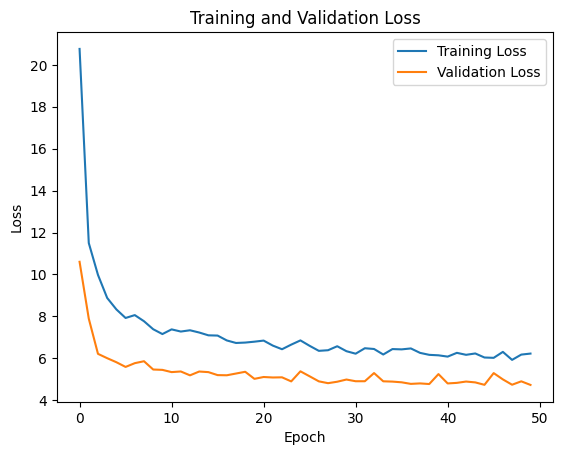

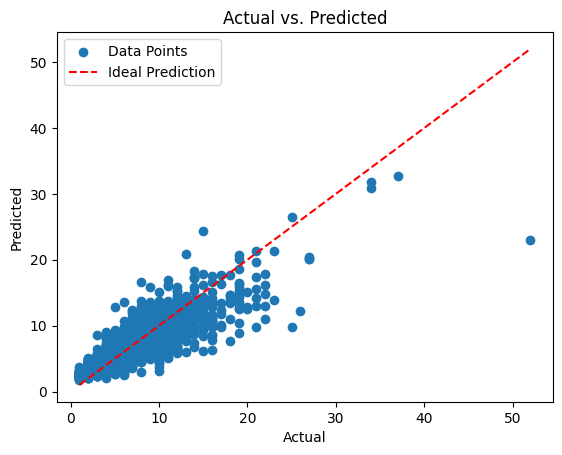

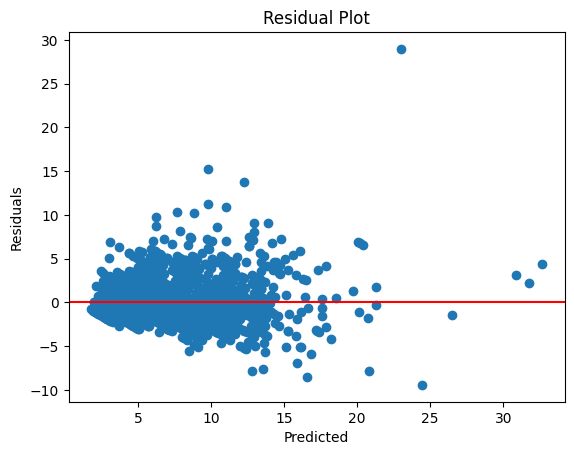

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loss Curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.scatter(y_test, y_pred, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')  # Plotting the ideal prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

# Residual Plot
residuals = y_test - y_pred.flatten()
plt.scatter(y_pred.flatten(), residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()



#Prever Rating

In [ ]:
data.head(1)

,ReservationId,RatingValue,Comments,Language,Translated,Polarity,NetPromoterScore,Aspects,Aspects_Polarity
0,1879140693,8,"Very nice place, it was spacious and good located! Communication between Feel Like Home and us was very good, they reply very fast! But, the only issue we had was that cockroaches and ants were everywhere (bedroom, kitchen, fridge, toilette, livingroom,...)",__label__en,nice place spacious welllocated communication feel like home u good replied fast issue cockroach ant everywhere bedroom kitchen fridge toilet living room,Positive,Good,place,positive


In [ ]:
rat = data[['Translated','Aspects','Aspects_Polarity','NetPromoterScore','Polarity']]

In [ ]:

rat = rat.groupby('Translated').agg({
    'Aspects': list,
    'Aspects_Polarity': list,
    'NetPromoterScore': 'first',  # Assuming NetPromoterScore is the same for all aspects of a review
    'Polarity': 'first'  # Assuming Polarity is the same for all aspects of a review
}).reset_index()

In [ ]:
rat['Number'] = rat['Aspects'].apply(len)

In [ ]:
rat['Number'].value_counts()

Number
3       1646
2       1487
4       1419
5       1100
6        946
7        619
8        597
9        484
10       356
11       314
12       256
13       214
1        176
14       149
15       121
16        90
17        58
18        48
19        47
21        28
20        24
22        20
23        11
27         7
25         7
24         6
32         5
26         4
28         4
30         2
37         2
34         2
31         2
40         2
38         1
29         1
36         1
61         1
1142       1
43         1
52         1
Name: count, dtype: int64

In [ ]:
rat = rat.drop(ra[ra['Number'] == 1142].index)

In [ ]:
sentences = [review.split() for review in rat['Translated']]  # Assuming 'Translated' column contains your reviews
model = gensim.models.Word2Vec(
    window=10,
    min_count=5,
    workers=4,
)
model.build_vocab(sentences, progress_per=1000)
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)


(946397, 1173660)

In [ ]:
def get_aspect_word_vectors(aspects, model):
    aspect_word_vectors = []
    for aspect_list in aspects:
        aspect_list_vectors = []
        for aspect in aspect_list:
            if aspect in model.wv:
                aspect_list_vectors.append(model.wv[aspect])
        if aspect_list_vectors:  # Check if list is not empty
            aspect_word_vectors.append(np.mean(aspect_list_vectors, axis=0))
        else:
            aspect_word_vectors.append(np.zeros(model.vector_size))  # Use zero vector if list is empty
    rat['Aspect_Word_Vectors'] = aspect_word_vectors

# Get aspect word vectors and add them to a new column
get_aspect_word_vectors(rat['Aspects'], model)

# Split reviews into sentences
sentences = [review.split() for review in rat['Translated']]

# Function to get word vectors and add them to a new column in ra
def get_word_vectors(words, model):
    vectors = []
    for word in words:
        if word in model.wv:
            vectors.append(model.wv[word])
        else:
            # If word not in vocabulary, use zero vector
            vectors.append(np.zeros(model.vector_size))
    return np.mean(vectors, axis=0)  # Calculate average vector for the review

# Get word vectors for each review and add them to a new column in ra
rat['Review_Word_Vectors'] = [get_word_vectors(review, model) for review in sentences]


In [ ]:
def map_polarity_to_numeric(polarity):
    if polarity == 'Positive':
        return 0
    elif polarity == 'Neutral':
        return 1
    elif polarity == 'Negative':
        return 2
    else:
        return None  # Return None for any other values

# Apply the function to create a new column 'Polarity_Numeric'
rat['Polarity_Numeric'] = rat['Polarity'].apply(map_polarity_to_numeric)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the data
rat['Aspects_PolarityP'] = rat['Aspects_Polarity'].apply(lambda x: encoder.fit_transform(x))

# Display the result


In [ ]:
rat.head(1)

,Translated,Aspects,Aspects_Polarity,NetPromoterScore,Polarity,Number,Aspect_Word_Vectors,Review_Word_Vectors,Polarity_Numeric,Aspects_PolarityP
0,absolute recommendation would book star,"[recommendation, star]","[positive, positive]",Very Good,Positive,2,"[-0.28226817, 0.10067645, -0.2030872, 0.02379936, 0.23815763, -0.2809112, -0.010753509, 0.6481447, -0.038236126, -0.08750001, -0.20941906, -0.38972563, -0.29602778, 0.0047827037, -0.0077970754, -0.08409284, 0.068062685, -0.43981653, 0.060342632, -0.40898997, -0.12253803, 0.097598776, -0.05775499, 0.057350215, -0.030407723, -0.2784494, -0.1850271, -0.39963207, -0.29702964, 0.10736177, 0.3685794, 0.09786023, -0.07637582, -0.09725591, -0.19984853, 0.20056434, -0.038950097, -0.2422252, -0.038366165, -0.558952, -0.04306633, -0.006971512, -0.18266845, -0.09834577, 0.16051692, -0.04464279, -0.17088407, -0.051588986, 0.12213646, 0.11734159, 0.044046592, -0.15875968, -0.061327033, 0.21750444, -0.16004959, 0.17869332, 0.2025015, -0.025996696, -0.30362248, -0.0828945, 0.022769634, 0.09498791, -0.11053431, -0.15144765, -0.27822605, -0.025857544, 0.043284565, 0.032530412, -0.31854814, 0.1638711, -0.054238103, 0.15136948, 0.05880812, -0.20759606, 0.19079977, 0.04719799, -0.013786341, -0.12473199, -0.20780247, -0.05591105, 0.05705727, -0.2309214, -0.36585832, 0.25735122, -0.12709583, 0.05301352, -0.104635686, 0.32245323, 0.26934686, 0.18754819, 0.23521467, 0.32900006, 0.0617038, 0.2500669, 0.39329287, 0.25476027, 0.1428965, -0.2641253, 0.13473634, -0.057413477]","[-0.29456353, -0.040881746, -0.18114647, -0.030553544, 0.3693345, -0.29992336, 0.05672431, 0.71810806, -0.18689902, -0.13318393, -0.37151256, -0.50449777, -0.58222765, -0.0058669364, -0.26348445, -0.02841857, -0.005373195, -0.5116193, 0.16308403, -0.43635625, -0.23209389, 0.11573102, -0.016205292, 0.20064518, 0.051973827, -0.29985672, -0.05392295, -0.33208597, -0.31221455, 0.19390818, 0.48253375, 0.12268619, -0.079524316, 0.08093353, -0.4338147, 0.17087537, -0.046728037, -0.25243312, -0.0322893, -0.51417434, 0.08335309, 0.05890117, -0.22112317, -0.10534058, 0.07840825, 0.029117271, -0.1134154, -0.09277478, 0.092770085, 0.1582656, 0.18155587, -0.060457148, 0.024031987, 0.18039966, -0.27893567, -0.053320218, 0.17756638, -0.15178725, -0.26999587, -0.2222389, 0.0742404, 0.2238513, -0.005458894, -0.34527043, -0.21613176, -0.10624243, 0.17174979, 0.006061143, -0.4062472, 0.031183636, 0.050385714, 0.21812308, -0.111245535, -0.40158144, 0.311719, 0.13917735, -0.18732008, -0.11455182, -0.12626965, -0.15069504, 0.16629699, -0.54774344, -0.40288177, 0.28579968, -0.15311043, -0.023665795, -0.16354114, 0.21390732, 0.22965927, 0.18485954, 0.095937744, 0.56063884, 0.2111909, 0.21950202, 0.57645416, 0.019719582, -0.0027702376, -0.33914477, 0.3205655, 0.031018725]",0,"[1, 0]"


Fold 1/5:
Epoch 1/50
223/223 [==============================] - 3s 6ms/step - loss: 2.1142 - accuracy: 0.6194 - val_loss: 1.6997 - val_accuracy: 0.7227
Epoch 2/50
223/223 [==============================] - 1s 5ms/step - loss: 1.6274 - accuracy: 0.6678 - val_loss: 1.4356 - val_accuracy: 0.7057
Epoch 3/50
223/223 [==============================] - 1s 4ms/step - loss: 1.3406 - accuracy: 0.6874 - val_loss: 1.1642 - val_accuracy: 0.7242
Epoch 4/50
223/223 [==============================] - 2s 7ms/step - loss: 1.1419 - accuracy: 0.6879 - val_loss: 0.9838 - val_accuracy: 0.7427
Epoch 5/50
223/223 [==============================] - 1s 4ms/step - loss: 1.0299 - accuracy: 0.6866 - val_loss: 0.9418 - val_accuracy: 0.7227
Epoch 6/50
223/223 [==============================] - 1s 4ms/step - loss: 0.9647 - accuracy: 0.6862 - val_loss: 0.8871 - val_accuracy: 0.7212
Epoch 7/50
223/223 [==============================] - 1s 4ms/step - loss: 0.9104 - accuracy: 0.6952 - val_loss: 0.9044 - val_accuracy: 0.7

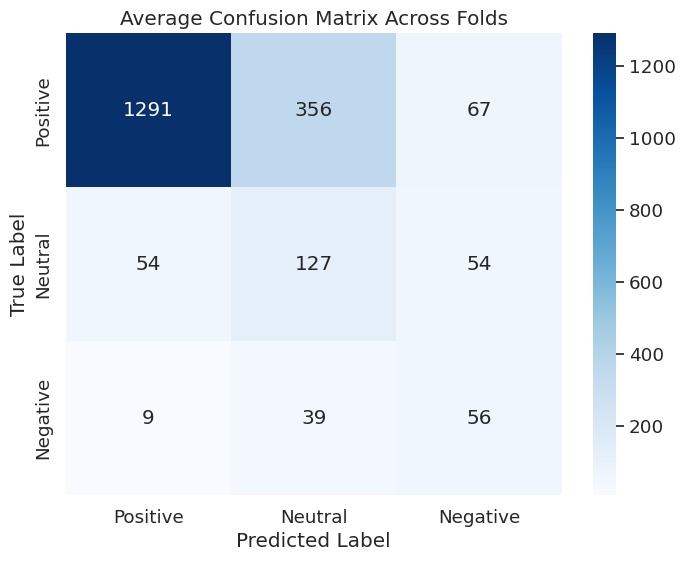

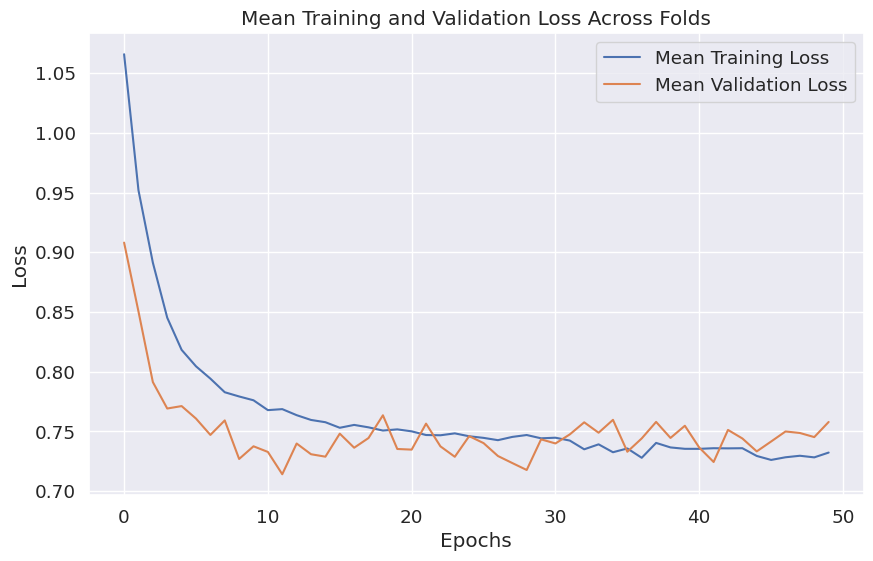

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Assuming rat['Review_Word_Vectors'], rat['Aspect_Word_Vectors'], and rat['Aspects_PolarityP'] are already populated
X_review = np.array(rat['Review_Word_Vectors'])
X_aspect = np.array(rat['Aspect_Word_Vectors'])
X_aspects_polarity = np.array(rat['Aspects_PolarityP'])  # Include the new feature
y = np.array(rat['Polarity_Numeric'])

# Flatten the input arrays
X_review_flat = np.array([x.flatten() for x in X_review])
X_aspect_flat = np.array([x.flatten() for x in X_aspect])

# Pad or truncate sequences to a fixed length
MAX_SEQ_LENGTH = 100  # Choose a suitable maximum sequence length
X_aspects_polarity_padded = tf.keras.preprocessing.sequence.pad_sequences(
    X_aspects_polarity, maxlen=MAX_SEQ_LENGTH, padding='post', truncating='post', dtype='float32'
)

# Concatenate all features
X_combined = np.hstack([X_review_flat, X_aspect_flat, X_aspects_polarity_padded])

# Standardize the features
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# Define the neural network architecture
input_shape = X_combined_scaled.shape[1]
inputs = Input(shape=(input_shape,))
x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001))(inputs)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001))(x)
x = Dropout(0.2)(x)
output = Dense(3, activation='softmax')(x)  # Softmax activation for multi-class classification

model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this as needed

# Define the cross-validation splitting strategy
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize an empty confusion matrix to aggregate results across all folds
conf_matrix_total = np.zeros((3, 3))

# Initialize lists to collect losses for plotting
train_losses = []
val_losses = []

# Perform cross-validation
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_combined_scaled, y)):
    print(f"Fold {fold + 1}/{num_folds}:")
    X_train_fold, X_val_fold = X_combined_scaled[train_indices], X_combined_scaled[val_indices]
    y_train_fold, y_val_fold = y[train_indices], y[val_indices]

    # Downsample the majority class in the training fold
    idx_class_0 = np.where(y_train_fold == 0)[0]
    idx_class_1 = np.where(y_train_fold == 1)[0]
    idx_class_2 = np.where(y_train_fold == 2)[0]

    # Calculate the number of samples to keep in class 0 (majority class)
    desired_ratio = 1.75
    num_minority_samples = len(idx_class_1) + len(idx_class_2)
    num_samples_class_0 = int(desired_ratio * num_minority_samples)

    # Randomly select a subset of samples from class 0
    np.random.seed(42)
    idx_class_0_downsampled = np.random.choice(idx_class_0, size=num_samples_class_0, replace=False)

    # Combine the indices
    idx_downsampled = np.concatenate([idx_class_0_downsampled, idx_class_1, idx_class_2])
    np.random.shuffle(idx_downsampled)

    # Create the downsampled training dataset
    X_train_downsampled = X_train_fold[idx_downsampled]
    y_train_downsampled = y_train_fold[idx_downsampled]

    # Apply SMOTE to generate synthetic samples for the minority classes
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_downsampled, y_train_downsampled)

    # Train the model
    history = model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_data=(X_val_fold, y_val_fold))

    # Save the losses for plotting later
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

    # Evaluate the model on the validation fold
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold)

    # Make predictions
    y_pred = model.predict(X_val_fold)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate confusion matrix for this fold
    conf_matrix_fold = confusion_matrix(y_val_fold, y_pred_classes)
    conf_matrix_total += conf_matrix_fold

    print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")
    print("")

# Calculate the average confusion matrix across folds
avg_conf_matrix = conf_matrix_total / num_folds
print("Average Confusion Matrix Across Folds:")
print(avg_conf_matrix)

# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(avg_conf_matrix, annot=True, fmt='.0f', cmap='Blues',
            xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# Convert lists of losses to numpy arrays for easy mean calculation
train_losses = np.array(train_losses)
val_losses = np.array(val_losses)

# Calculate the mean losses across all folds
mean_train_loss = np.mean(train_losses, axis=0)
mean_val_loss = np.mean(val_losses, axis=0)

# Plot the mean training loss and mean validation loss
plt.figure(figsize=(10, 6))
plt.plot(mean_train_loss, label='Mean Training Loss')
plt.plot(mean_val_loss, label='Mean Validation Loss')
plt.title('Mean Training and Validation Loss Across Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Sentiment analysis


In [ ]:
data

,ReservationId,RatingValue,Comments,Language,Translated,Polarity,NetPromoterScore,Aspects,Aspects_Polarity
0,1879140693,8,"Very nice place, it was spacious and good loca...",__label__en,nice place spacious welllocated communication ...,Positive,Good,place,positive
1,1879140693,8,"Very nice place, it was spacious and good loca...",__label__en,nice place spacious welllocated communication ...,Positive,Good,location,positive
2,1879140693,8,"Very nice place, it was spacious and good loca...",__label__en,nice place spacious welllocated communication ...,Positive,Good,communication,positive
3,1879140693,8,"Very nice place, it was spacious and good loca...",__label__en,nice place spacious welllocated communication ...,Positive,Good,home,positive
4,1879140693,8,"Very nice place, it was spacious and good loca...",__label__en,nice place spacious welllocated communication ...,Positive,Good,reply,positive
...,...,...,...,...,...,...,...,...,...
63742,1879180188,4,"pro: melhor localização no centro da cidade, o...",__label__pt,pro best location city center apartment clean ...,Positive,Good,company,negative
63743,1879180188,4,"pro: melhor localização no centro da cidade, o...",__label__pt,pro best location city center apartment clean ...,Positive,Good,checkin,negative
63744,1879180188,4,"pro: melhor localização no centro da cidade, o...",__label__pt,pro best location city center apartment clean ...,Positive,Good,checkout,negative
63745,1879180188,4,"pro: melhor localização no centro da cidade, o...",__label__pt,pro best location city center apartment clean ...,Positive,Good,luggage,negative


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment_task = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
sentiment_task("Covid cases are increasing fast!")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'label': 'negative', 'score': 0.7235766649246216}]

In [ ]:
data = data.groupby('Translated')['Polarity'].first().reset_index()
data['Polarity'] = data['Polarity'].str[0]

In [ ]:

def analyze_sentiment(text):
    result = sentiment_task(text)[0]
    return result['label'], result['score']

# Apply sentiment analysis with progress bar
sentiments = []
for text in tqdm(data['Translated'], desc="Analyzing Sentiments"):
    sentiments.append(analyze_sentiment(text))

# Convert list of sentiments to DataFrame and concatenate with original DataFrame
sentiment_df = pd.DataFrame(sentiments, columns=['Sentiment_Label', 'Sentiment_Score'])
data = pd.concat([data, sentiment_df], axis=1)

# Display the DataFrame with sentiment results
print(data.head())


Analyzing Sentiments: 100%|██████████| 10260/10260 [29:10<00:00,  5.86it/s]

                                          Translated  Polarity  \
0            absolute recommendation would book star  Positive   
1  absolute top location easily explore lisbon fo...  Positive   
2  absolutely amazing great host super location c...  Positive   
3  absolutely amazing home home brand new literal...  Positive   
4  absolutely amazing location clean place host a...  Positive   

  Sentiment_Label  Sentiment_Score  
0        positive         0.952785  
1        positive         0.915210  
2        positive         0.979172  
3        positive         0.986893  
4        positive         0.977086  


In [ ]:
data['Sentiment_Label'].value_counts()

Sentiment_Label
positive    8356
neutral     1152
negative     752
Name: count, dtype: int64

In [ ]:
data['Polarity'].value_counts()

Polarity
Positive    8568
Neutral     1176
Negative     516
Name: count, dtype: int64

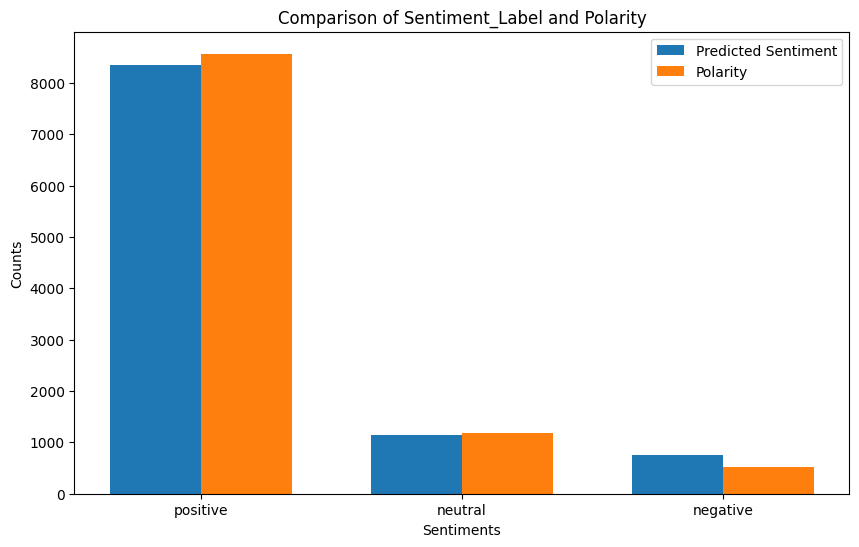

In [ ]:
sentiment_counts = {'positive': 8356, 'neutral': 1152, 'negative': 752}

# Value counts for Polarity
polarity_counts = {'Positive': 8568, 'Neutral': 1176, 'Negative': 516}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.35

# Plotting Sentiment_Label
sentiment_bars = ax.bar(
    range(len(sentiment_counts)),
    sentiment_counts.values(),
    width,
    label='Predicted Sentiment'
)

# Plotting Polarity
polarity_bars = ax.bar(
    [p + width for p in range(len(polarity_counts))],
    polarity_counts.values(),
    width,
    label='Polarity'
)

# Adding labels
ax.set_xlabel('Sentiments')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Sentiment_Label and Polarity')
ax.set_xticks([p + width / 2 for p in range(len(sentiment_counts))])
ax.set_xticklabels(sentiment_counts.keys())
ax.legend()

# Show plot
plt.show()